In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


# Utility functions
def sigmoid(x, k, x0):
    return 1 / (1 + np.exp(-k * (x - x0)))

def average_altruism_probability(population):
    return sum(individual.altruism_probability() for individual in population) / len(population)


# Individual
class Individual:
    def __init__(self, payoff_altruism, payoff_defect, lollipop_benefit):
        self.payoff_altruism = payoff_altruism
        self.payoff_defect = payoff_defect
        self.lollipop_benefit = lollipop_benefit
        self.lollipops_received = 0
        self.neighbors = list()
        
    def altruism_probability(self):
        delta_pi = self.payoff_altruism - self.payoff_defect + self.lollipops_received * self.lollipop_benefit
        return sigmoid(delta_pi, 1, 0)


# Simulation
def run_simulation(population_size, iterations, maximum_number_neighbors, payoff_altruism, payoff_defect, lollipop_benefit):
    # contains generations + 1 averages (because it includes the initial average too)
    average_altruism_probabilities = list()
    # Set up simulation
    population = [Individual(payoff_altruism, payoff_defect, lollipop_benefit) for _ in range(population_size)]
    for individual in population:
        # number of neighbors chosen UAR between 1 and maximum_number_neighbors
        individual.neighbors = random.sample(population, random.randint(1, maximum_number_neighbors))  
        # prohibit an individual from being their own neighbor
        if individual in individual.neighbors:
            individual.neighbors.remove(individual)
    average_altruism_probabilities.append(average_altruism_probability(population))

    # Run simulation 
    for _ in range(iterations):
        for individual in population:
            altruism_probability = individual.altruism_probability()
            for neighbor in individual.neighbors:
                if altruism_probability > random.random():
                    neighbor.lollipops_received += 1
        average_altruism_probabilities.append(average_altruism_probability(population))
    
    return average_altruism_probabilities

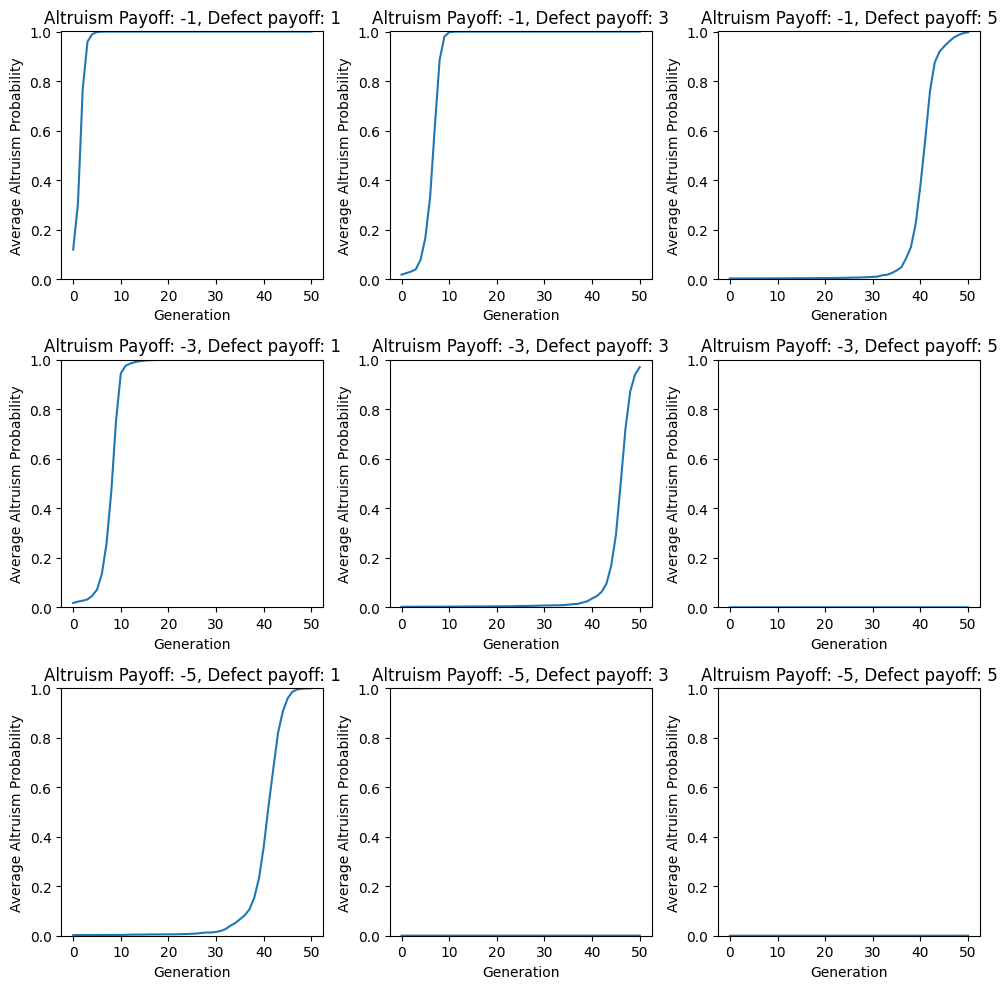

In [7]:
payoff_altruism_values =  [-1, -3, -5]
payoff_defect_values = [1, 3, 5]

fig, axes = plt.subplots(len(payoff_altruism_values), len(payoff_defect_values), figsize=(10, 10))

for i, payoff_altruism in enumerate(payoff_altruism_values):
    for j, payoff_defect in enumerate(payoff_defect_values):
        average_altruism_probabilities = run_simulation(population_size=100, 
                                                        iterations=50, 
                                                        maximum_number_neighbors=10, 
                                                        payoff_altruism=payoff_altruism, 
                                                        payoff_defect=payoff_defect, 
                                                        lollipop_benefit=1)

        # Plot results in corresponding subplot
        ax = axes[i][j]
        ax.plot(average_altruism_probabilities)
        ax.set_title(f'Altruism Payoff: {payoff_altruism}, Defect payoff: {payoff_defect}')
        ax.set_xlabel('Generation')
        ax.set_ylabel('Average Altruism Probability')
        ax.set_ylim(0, 1.001)
        

plt.tight_layout()
plt.show()


In [5]:
from collections import deque

def cascade(graph, start_node):
    visited = set()
    queue = deque([start_node])

    while queue:
        current_node = queue.popleft()
        if current_node in visited:
            continue

        visited.add(current_node)
        print("Cascading node:", current_node)

        neighbors = graph.get(current_node, [])
        queue.extend(neighbors)

# Example graph
graph = {
    'A': ['B', 'C'],
    'B': ['C', 'D'],
    'C': ['E'],
    'D': [],
    'E': ['D']
}

start_node = 'A'
cascade(graph, start_node)

Cascading node: A
Cascading node: B
Cascading node: C
Cascading node: D
Cascading node: E
